In [1]:
from qiskit import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmqx2')
from qiskit.ignis.characterization.gates import *
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [2]:
qubits = [0]
controls = [0]

In [6]:
meas_calibs, state_labels = complete_meas_cal(qubit_list=qubits, qr=5, circlabel='mcal')
cal_job = qiskit.execute(meas_calibs, backend=backend, shots=8192)
cal_results = cal_job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')

#Calibration matrix for result C
raw_counts = job.result().get_counts()

# Get the filter object
meas_filter = meas_fitter.filter

# Results with mitigation
mitigated_results = meas_filter.apply(job.result())
mitigated_counts = mitigated_results.get_counts(0)

In [3]:
"""
Taken from https://qiskit.org/documentation/apidoc/characterization.html
1 Qubit Amplitude Cal
"""

circuit, xdata = ampcal_1Q_circuits(75, qubits)
job = qiskit.execute(circuit, backend=backend, shots=8192)
plt.figure(figsize=(10, 6))
initial_theta = 0.02
initial_c = 0.5
initial_phi = 0.1




<Figure size 720x432 with 0 Axes>

Mitigated Rotation Error on U2(1,0): 0.012672 rads


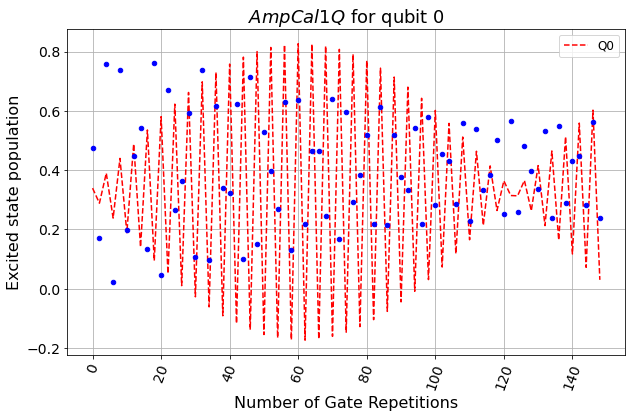

In [4]:
fit = AmpCalFitter(job.result(), xdata, qubits,
                   fit_p0=[initial_theta, initial_c],
                   fit_bounds=([-np.pi, -1],
                               [np.pi, 1]))

# plot the result for the number 1 indexed qubit.
# In this case that refers to Q2 since we passed in as [4, 2])
plt.figure(figsize=(10, 6))
fit.plot(0, ax=plt.gca())

print("Mitigated Rotation Error on U2(1,0): %f rads"%(fit.angle_err()[0]))
plt.show()

In [ ]:
# 1 Qubit Angle Cal
circuit, xdata = anglecal_1Q_circuits(75, qubits)
job = qiskit.execute(circuit, backend=backend, shots=8192)
plt.figure(figsize=(10, 6))
initial_theta = 0.02
initial_c = 0.5
initial_phi = 0.01


fit = AngleCalFitter(job.result(), xdata, qubits,
                   fit_p0=[initial_theta, initial_c],
                   fit_bounds=([-np.pi, -1],
                               [np.pi, 1]))

fit.plot(0, ax=plt.gca())

print("Angle error between X and Y: %f rads"%(fit.angle_err()[0]))
plt.show()

In [ ]:
circs, xdata = ampcal_cx_circuits(75, qubits, controls)

shots = 8192
backend_result1 = qiskit.execute(circs, backend, shots=shots).result()

plt.figure(figsize=(10, 6))
initial_theta = 0.02
initial_c = 0.5
initial_phi = 0.01


fit = AmpCalCXFitter(backend_result1, xdata, qubits,
                   fit_p0=[initial_theta, initial_c],
                   fit_bounds=([-np.pi, -1],
                               [np.pi, 1]))

fit.plot(0, ax=plt.gca())

print("Rotation Error on C0X1: %f rads"%(fit.angle_err()[0]))
plt.show()

In [ ]:
circs[2].draw(output='mpl')